The point of this excercise is to build a two layer neural network capable of lerning the XOR problem using only numpy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#We will use the sigmoid function as an activation functuion.
def sigmoid(x):
    return 1/(1+ np.exp(-x))
#We need derivative of the activation function to implement backprop
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

Create a general class of a two layer feed forward neural network with backpropagation as a training algorithm

In [2]:
class two_layer_nn:
    def __init__(self, x, y):
        """
        This is a class for a neural network with one hidden layer and an output
        layer. No bias terms or any regularization techniques. Input must be a
        2xn feature matrix, label is a 1xn matrix.
        """
        self.input = x
        # 2x2 weight matrix connecting input layer to the first hidden layer
        self.wt_1 = np.random.rand(2, 2)
        # 1x2 matrix connecting the hiddel alye with the output layer
        self.wt_2 = np.random.rand(1,2)
        self.label = y
        #output layer
        self.pred = np.zeros(self.label.shape)

    def forwd(self):
        """
        A function that performs a forward pass of data through neural network
        """
        self.lay_1 = sigmoid(np.matmul(self.wt_1, self.input))
        self.pred = sigmoid(np.matmul(self.wt_2, self.lay_1))
        return self.pred

    def back_prop(self):
        """
        A function that performs back propagation based on mean squared error
        as an accuracy metric
        """
        wt_2_up = np.matmul(.5*(self.pred - self.label) * sigmoid_der(np.matmul(self.wt_2, self.lay_1)), self.lay_1.T)
        a = .5*(self.pred - self.label) * sigmoid_der(np.matmul(self.wt_2, self.lay_1))
        wt_1_up = np.matmul(np.matmul(self.wt_2.T,a)*sigmoid_der(np.matmul(self.wt_1,self.input)), self.input.T)

        #Update weights
        self.wt_2 -= wt_2_up
        self.wt_1 -= wt_1_up
        return wt_2_up

    def mse(self):
        """
        Mean squared error function
        """
        mean_squared_error = np.linalg.norm(self.pred - self.label)**2
        return mean_squared_error

Learning XOR

In [3]:
#input of xor function
X = np.array([
            [0,0,1,1],
            [1,0,0,1]
            ])
#Labels
Y = np.array([[1,0,1,0]])

In [4]:
xor_nn = two_layer_nn(X, Y)
#create list of the mean squared error to see the learning progress
mse_list=[]

In [5]:
#Learning xor by repeaded forwward and backward pass of the data
for i in range(100000):
    xor_nn.forwd()
    xor_nn.back_prop()
    mse_list.append(xor_nn.mse())

In [6]:
print("Prediction of the network: ", xor_nn.pred)
print("Labels:", Y)

Prediction of the network:  [[0.9713155  0.01059322 0.97131551 0.03851225]]
Labels: [[1 0 1 0]]


plot of the mean squared error

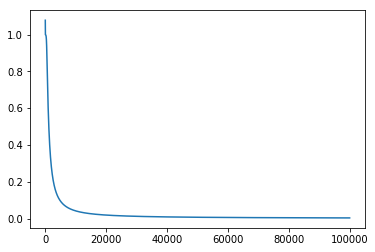

In [7]:
mse_plot = plt.plot(mse_list)